In [90]:
import pandas as pd
import numpy as np

In [91]:
import matplotlib.pyplot as plt

In [92]:
import seaborn as sns

In [93]:
%matplotlib inline

In [94]:
training_set = pd.read_csv('train.csv')

In [95]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


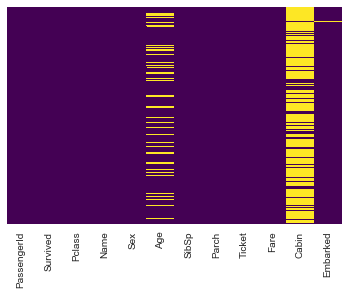

In [96]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [97]:
sns.set_style('darkgrid')

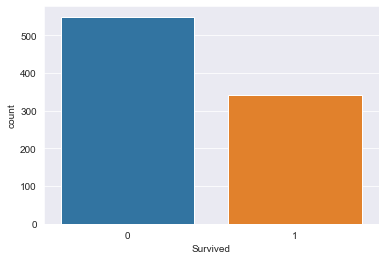

In [98]:
sns.countplot(x='Survived', data=training_set)

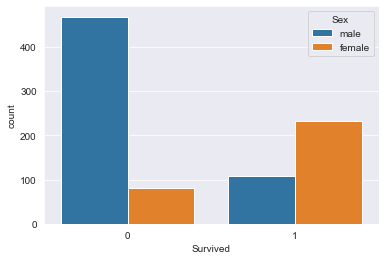

In [99]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

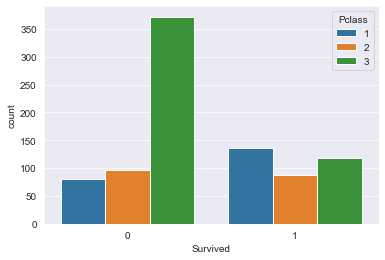

In [100]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

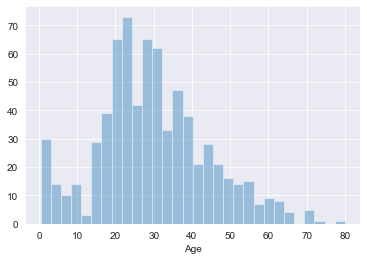

In [101]:
sns.distplot(training_set['Age'].dropna(), kde=False, bins=30)

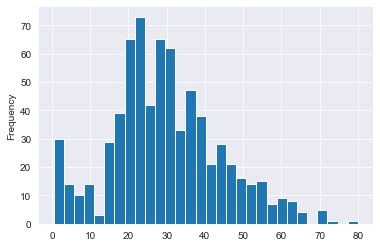

In [102]:
training_set['Age'].plot.hist(bins=30)

In [103]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


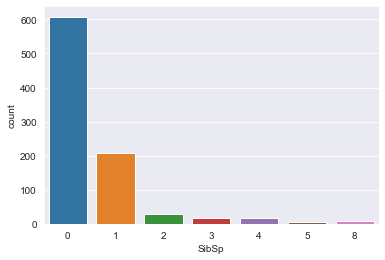

In [104]:
sns.countplot(x='SibSp', data=training_set)

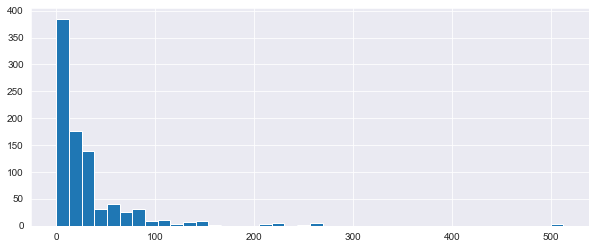

In [105]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

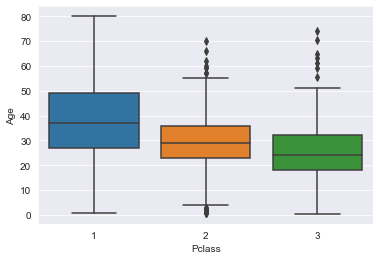

In [106]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

In [107]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [108]:
training_set['Age'] = training_set[['Age', 'Pclass']].apply(impute_age, axis=1)

In [109]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


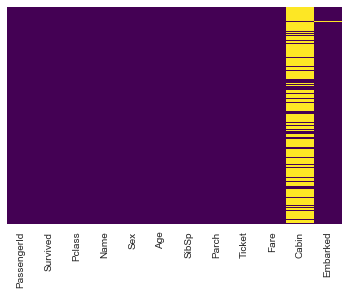

In [110]:
sns.heatmap(training_set.isnull(), yticklabels=True, cbar=False, cmap='viridis')

In [111]:
training_set.drop('Cabin', axis=1, inplace=True)

In [112]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [113]:
training_set.dropna(inplace=True)

In [114]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [115]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [116]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [117]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [118]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [119]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [120]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [121]:
training_set.drop('PassengerId', axis=1, inplace=True)

In [122]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [123]:
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=333)

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lrm = LogisticRegression()

In [128]:
lrm.fit(X_train, y_train)

C:\Users\mi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
predictions = lrm.predict(X_test)

In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       217
           1       0.76      0.62      0.68       139

    accuracy                           0.78       356
   macro avg       0.77      0.75      0.75       356
weighted avg       0.77      0.78      0.77       356



In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test, predictions)

array([[190,  27],
       [ 53,  86]], dtype=int64)